<a href="https://colab.research.google.com/github/ritika-singh2000/Text-Summarization-Abstractive-Method/blob/main/Text_Summarization_Abstraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Importing libraries
import pandas as pd
import numpy as np 
import re
import nltk
import tensorflow as tf
import os
from nltk.corpus import stopwords
from matplotlib import pyplot
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('punkt')
nltk.download("stopwords")
stop_words = stopwords.words('english')
import plotly.express as px
import statistics
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import Layer


# Model Building 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , TimeDistributed ,LSTM , Embedding ,  Attention,Flatten ,Input , Concatenate , Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras import backend as K 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
from google.colab import drive 
drive.mount('/content/gdrive')
reviews=pd.read_csv('gdrive/My Drive/Reviews.csv')
reviews.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [107]:
# Reading the data

reviews = reviews.head(20000)
reviews = reviews.astype(str)
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [108]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      20000 non-null  object
 1   ProductId               20000 non-null  object
 2   UserId                  20000 non-null  object
 3   ProfileName             20000 non-null  object
 4   HelpfulnessNumerator    20000 non-null  object
 5   HelpfulnessDenominator  20000 non-null  object
 6   Score                   20000 non-null  object
 7   Time                    20000 non-null  object
 8   Summary                 20000 non-null  object
 9   Text                    20000 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [109]:
reviews.describe()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,20000,2657,17677,16740,80,86,5,2226,16855,19308
top,15868,B003VXFK44,A1Z54EM24Y40LL,c2,0,0,5,1235606400,Delicious,Diamond Almonds<br />Almonds are a good source...
freq,1,455,22,22,10910,9696,12571,52,78,7


In [110]:
# Removing the duplicate values
reviews.drop_duplicates(inplace=True , subset=['Text'])

In [111]:
data = reviews.copy()
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [112]:
text  = data['Text']
text


0        I have bought several of the Vitality canned d...
1        Product arrived labeled as Jumbo Salted Peanut...
2        This is a confection that has been around a fe...
3        If you are looking for the secret ingredient i...
4        Great taffy at a great price.  There was a wid...
                               ...                        
19974    I have 2 "picky-eater" cats. They aren't reall...
19975    I have 2 female cats. I have given them other ...
19976    My cats are very picky but they love this food...
19977    I have the enviable job of getting two pills i...
19978    My 2nd adventure for health into ingesting Alo...
Name: Text, Length: 19308, dtype: object

In [113]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


In [114]:
# Data cleaning
def msg_clean(msg):
    
    msg = msg.lower()
    tag = re.compile('<.*?>')
    msg = re.sub(tag , ' ' , msg)
    res = ' '.join([contraction_mapping.get(i, i) for i in msg.split()])
    res = res.replace("'s" , "")    
    clean = [(char) for char in res if char not in string.punctuation]
    clean = "".join(clean)         
    return clean


In [115]:
data['Text']

0        I have bought several of the Vitality canned d...
1        Product arrived labeled as Jumbo Salted Peanut...
2        This is a confection that has been around a fe...
3        If you are looking for the secret ingredient i...
4        Great taffy at a great price.  There was a wid...
                               ...                        
19974    I have 2 "picky-eater" cats. They aren't reall...
19975    I have 2 female cats. I have given them other ...
19976    My cats are very picky but they love this food...
19977    I have the enviable job of getting two pills i...
19978    My 2nd adventure for health into ingesting Alo...
Name: Text, Length: 19308, dtype: object

In [116]:

data['Text'] = data['Text'].apply(msg_clean)
data['Text']

0        i have bought several of the vitality canned d...
1        product arrived labeled as jumbo salted peanut...
2        this is a confection that has been around a fe...
3        if you are looking for the secret ingredient i...
4        great taffy at a great price there was a wide ...
                               ...                        
19974    i have 2 pickyeater cats they are not really f...
19975    i have 2 female cats i have given them other f...
19976    my cats are very picky but they love this food...
19977    i have the enviable job of getting two pills i...
19978    my 2nd adventure for health into ingesting alo...
Name: Text, Length: 19308, dtype: object

In [117]:
# Removing stopwords and removing words having length less than 2
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >2 and token not in stop_words:
                result.append(token)
    return result              
data['New Text'] = data['Text'].apply(preprocess)
data['New Text'] = data['New Text'].apply(lambda x : " ".join(x))
data['New Text']

0        bought vitality canned dog food products good ...
1        product arrived labeled jumbo salted peanutsth...
2        confection centuries light pillowy citrus gela...
3        looking secret ingredient robitussin believe g...
4        great taffy great price wide assortment yummy ...
                               ...                        
19974    pickyeater cats fans canned food particularly ...
19975    female cats given friskies food time indoor ty...
19976    cats picky love food dense provides large good...
19977    enviable job getting pills cee cee daily mix w...
19978    adventure health ingesting aloe taste realizin...
Name: New Text, Length: 19308, dtype: object

In [118]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,bought vitality canned dog food products good ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,confection centuries light pillowy citrus gela...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe g...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide ...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...
19974,19975,B001G0NKVO,A3S6UHNZL8TPZ7,"Heather R. Wilson ""meeko77""",0,0,5,1348876800,My picky cats actually eat this,i have 2 pickyeater cats they are not really f...,pickyeater cats fans canned food particularly ...
19975,19976,B001G0NKVO,AWM9OVTK6GAXV,ashrh,0,0,5,1347580800,my cats love this!,i have 2 female cats i have given them other f...,female cats given friskies food time indoor ty...
19976,19977,B001G0NKVO,A1ZMHZB2VX08CT,J. Lyons,0,0,5,1343347200,tasty,my cats are very picky but they love this food...,cats picky love food dense provides large good...
19977,19978,B001G0NKVO,A1HRYC60VTMYC0,Ace,0,0,5,1339459200,Mmm! Cee Cee's FAVORITE!!!,i have the enviable job of getting two pills i...,enviable job getting pills cee cee daily mix w...


In [119]:
text = data['New Text'].values
text[:5]

array(['bought vitality canned dog food products good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
       'product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
       'confection centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
       'looking secret ingredient robitussin believe got addition root beer extract ordered good cherry soda flavor medicinal',
       'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal'],
      dtype=object)

In [120]:
# Cheking the maximum length of each Text in data
max_len = 0
data['length of text'] =  data['New Text'].apply(lambda x : len(x))

In [121]:
max_len_text = max(data['length of text']) 
max_len_text

6024

In [122]:
data['Summary']

0                                   Good Quality Dog Food
1                                       Not as Advertised
2                                   "Delight" says it all
3                                          Cough Medicine
4                                             Great taffy
                               ...                       
19974                     My picky cats actually eat this
19975                                  my cats love this!
19976                                               tasty
19977                          Mmm! Cee Cee's FAVORITE!!!
19978    Aloe vera gel, Honey, High Frutose Corn Syrup...
Name: Summary, Length: 19308, dtype: object

In [123]:
# Data  cleaning for the target 
data['Summary'] = data['Summary'].apply(msg_clean)  
data['New Summary'] = data['Summary'].apply(preprocess)
data['New Summary'] = data['New Summary'].apply(lambda x : " ".join(x))
data['length of summary'] =  data['Summary'].apply(lambda x : len(x))
max_len_summary =  max(data['length of summary']) 
max_len_summary

125

In [124]:
# To visualize the count of words in each text and summary
text_words_count = []
summary_words_count = []

for i in data['New Text']:
   text_words_count.append(len(i.split()))

for i in data['New Summary']:
   summary_words_count.append(len(i.split()))   

count = pd.DataFrame({'text_count' : text_words_count , 'summary_count' :summary_words_count})

In [125]:
fig = px.histogram(count,x ='text_count')
fig.show()

In [126]:
fig = px.histogram(count,x ='summary_count')
fig.show()

In [127]:
# Taking the average length of each word
text_count_mean  =  int(statistics.mean(count['text_count']))
summary_count_mean  =  int(statistics.mean(count['summary_count']))

In [128]:
print( "Text count mean : " ,text_count_mean)
print( "Summary count mean : " ,summary_count_mean)

Text count mean :  32
Summary count mean :  2


In [129]:
# Getting the unique word for text in our Text and Target
unique_text_words  = []
unique_summary_words  = []
def get_unique_words(msg ,li):
    for i in msg.split():
        if i not in li :
            li.append(i)

In [130]:
data['New Text'].apply(lambda x : get_unique_words(x , unique_text_words ))
data['New Summary'].apply(lambda x :get_unique_words(x ,unique_summary_words))
unique_text_words_total_length = len(unique_text_words)
unique_summary_words_total_length = len(unique_summary_words)

In [131]:

maxlen_text = -1
maxlen_summary = -1  
for doc in data['New Text']:
    tokens = nltk.word_tokenize(doc)
    if maxlen_text < len(tokens):
        maxlen_text = len(tokens)
        

In [132]:
for doc in data['New Summary']:
    tokens = nltk.word_tokenize(doc)
    if maxlen_summary < len(tokens):
        maxlen_summary = len(tokens)

In [133]:
print("The maximum values in the text : ",maxlen_text)
print("The maximum values in the summary: ",maxlen_summary)

The maximum values in the text :  805
The maximum values in the summary:  14


In [134]:
# Finally setting up the maximum length of the Text and Target
maxlen_summary = 5
maxlen_text = 32

In [135]:
type(data['New Summary'])

pandas.core.series.Series

In [136]:
data['New Text'].shape 

(19308,)

In [137]:
# Addition of the <start> and <end> tokens to the Target (before feeding into the decoder)
data['New Summary'] = data['New Summary'].apply(lambda x :"start " +x+ " stop ")

In [138]:
#Splitting the dataset
x_train , x_test , y_train , y_test = train_test_split(np.array(data['New Text']) , np.array(data['New Summary']) , test_size = 0.2 , shuffle = True,random_state=0)

In [139]:
x_train.shape

(15446,)

In [140]:
y_train.shape

(15446,)

In [141]:

#Applying tokenization and padding to the given Text data
x_tokenizer = Tokenizer(char_level =False)
x_tokenizer.fit_on_texts(list(x_train))
x_train_sequences = x_tokenizer.texts_to_sequences(x_train)
x_test_sequences = x_tokenizer.texts_to_sequences(x_test)
x_train_padded = pad_sequences(x_train_sequences , maxlen = maxlen_text , padding ='post')
x_test_padded = pad_sequences(x_test_sequences , maxlen = maxlen_text , padding ='post')
  

In [142]:
#Applying tokenization and padding to the given Target data
y_tokenizer = Tokenizer(char_level =False)
y_tokenizer.fit_on_texts(list(y_train))
y_train_sequences = y_tokenizer.texts_to_sequences(y_train)
y_test_sequences = y_tokenizer.texts_to_sequences(y_test)
y_train_padded = pad_sequences(y_train_sequences , maxlen = maxlen_summary , padding ='post')
y_test_padded = pad_sequences(y_test_sequences , maxlen = maxlen_summary , padding ='post')
  

In [143]:
x_vocab_size = len(x_tokenizer.word_index) +1
y_vocab_size = len(y_tokenizer.word_index)+1
print("x vocabulary size : " ,x_vocab_size )
print("x vocabulary size : " ,y_vocab_size )

x vocabulary size :  27451
x vocabulary size :  5914


In [146]:
# Training Model Setup
latent_dim =  400

#Encoder
encoder_inputs = Input(shape= (maxlen_text,))
embedding = Embedding(x_vocab_size , latent_dim , trainable = True)(encoder_inputs)


# LSTM layer-1
en_lstm1 = LSTM(latent_dim , return_sequences=True, return_state=True, dropout = 0.5)
en_out1 , h1 , c1 = en_lstm1(embedding)

#LSTM layer-2
en_lstm2 = LSTM(latent_dim , return_sequences=True, return_state=True, dropout = 0.5)
en_out2 , h2 , c2 = en_lstm2(en_out1)

#LSTM layer-3
en_lstm3 = LSTM(latent_dim , return_sequences=True, return_state=True, dropout = 0.5)
en_out3 , h3 , c3 = en_lstm3(en_out2)

#Decoder
decoder_inputs = Input(shape= (None,))
de_embedding_layer = Embedding(y_vocab_size , latent_dim , trainable = True)
de_embedding = de_embedding_layer(decoder_inputs)

# LSTM layer-1
de_lstm1 = LSTM(latent_dim , return_sequences=True, return_state=True)
de_out1 , de_h1 , de_c1 = de_lstm1(de_embedding , initial_state = [h3,c3])

# Attention Layer 
attn_layer = AttentionLayer(name='attention_layer') 
attn_out , attn_states = attn_layer([ en_out3,de_out1])

# Concatenate attention input and decoder LSTM output
concat = Concatenate(axis=-1  , name = "Concatenation_layer")([de_out1 ,attn_out])

# Dense Layer
dense = TimeDistributed(Dense(y_vocab_size ,activation='softmax' ))
de_out = dense(concat)

# Define the model

model = Model([encoder_inputs,decoder_inputs],de_out)
model.summary()



Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 32, 400)      10980400    input_11[0][0]                   
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 32, 400), (N 1281600     embedding_4[0][0]                
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, None)]       0                                            
______________________________________________________________________________________

In [147]:
model.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy')

In [148]:
es = EarlyStopping(monitor= 'val_loss' , patience= 2 , mode= 'min' , verbose=1 )

In [149]:
history=model.fit([x_train_padded,y_train_padded[:,:-1]], y_train_padded.reshape(y_train_padded.shape[0],y_train_padded.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_test_padded,y_test_padded[:,:-1]], y_test_padded.reshape(y_test_padded.shape[0],y_test_padded.shape[1], 1)[:,1:]))

Epoch 1/50
121/121 [==============================] - 15s 124ms/step - loss: 4.3692 - val_loss: 3.6876
Epoch 2/50
121/121 [==============================] - 14s 115ms/step - loss: 3.9020 - val_loss: 3.5478
Epoch 3/50
121/121 [==============================] - 14s 116ms/step - loss: 3.7160 - val_loss: 3.4412
Epoch 4/50
121/121 [==============================] - 14s 115ms/step - loss: 3.5685 - val_loss: 3.4002
Epoch 5/50
121/121 [==============================] - 14s 114ms/step - loss: 3.4504 - val_loss: 3.3353
Epoch 6/50
121/121 [==============================] - 14s 115ms/step - loss: 3.3482 - val_loss: 3.3411
Epoch 7/50
121/121 [==============================] - 14s 114ms/step - loss: 3.2498 - val_loss: 3.3283
Epoch 8/50
121/121 [==============================] - 14s 116ms/step - loss: 3.1614 - val_loss: 3.3551
Epoch 9/50
121/121 [==============================] - 14s 114ms/step - loss: 3.0687 - val_loss: 3.3770
Epoch 00009: early stopping


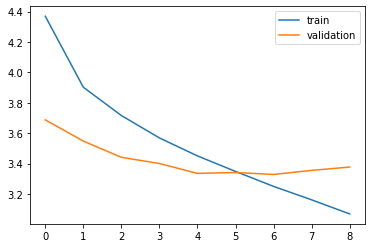

In [150]:
#Plotting the loss of training and validation data
pyplot.plot(history.history['loss'] , label = 'train')
pyplot.plot(history.history['val_loss'] , label = 'validation')
pyplot.legend()
pyplot.show()

In [151]:
reverse_source_word_index =  x_tokenizer.index_word #gets the word from the particular index
reverse_target_word_index =  y_tokenizer.index_word
target_word_index = y_tokenizer.word_index #gets the index of a particular word

In [153]:
# Inference Model
# Encoder Inference
encoder_model = Model(encoder_inputs, outputs = [en_out3 , h3 , c3])

# Decoder Inference
#The following tensors will holdthe sates ofthe prevoius time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape = (maxlen_text , latent_dim))
st = [decoder_state_input_h , decoder_state_input_c]

# Get the encodings for decoder sequence 
de_emb_inf = de_embedding_layer(decoder_inputs)

# To predict the next in the sequence , set the initial states to the states from the previous time step
de_out_2 , de_h2 , de_c2 = de_lstm1(de_emb_inf , initial_state=st)

#Attention Inference
attn_out_inf , attn_states_inf  = attn_layer([decoder_hidden_state_input,de_out_2])

# Concatenate
de_inf_concat = Concatenate(axis = -1 , name="concate")([de_out_2 ,attn_out_inf])

# Dense - softmax layer 
de_out_2 = dense(de_inf_concat)

#Final Decoder Model
decoder_model = Model (
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h ,decoder_state_input_c] , [de_out_2] +[de_h2 , de_c2]
)


In [154]:
def decode_sequence(input_seq):

  # Encode  the input as state vectors 
  eout, e_h , e_c  = encoder_model.predict(input_seq)

  #Generate the target sequencw of length 1 
  target_seq = np.zeros((1,1))
  # Populate the first charachter of the target sequence with the start character
  target_seq[0 ,0] = target_word_index["start"]

  stop_condition = False

  decode_sentence = ''
  while not stop_condition:

    output_tokens , h, c = decoder_model.predict([target_seq] + [eout, e_h , e_c])
    # Sample a token
    sample_token_index =  np.argmax(output_tokens[0,-1,:])
    sampled_word = reverse_target_word_index[sample_token_index]
    if(sampled_word!='stop'):
            decode_sentence += ' '+sampled_word


    #Exit Condition
    if (sampled_word == 'stop' or len(decode_sentence.split()) >= (maxlen_summary -1)):
      stop_condition=True

    # Update the target sequence (of length 1)
    target_seq = np.zeros((1,1))
    target_seq[0 ,0] = sample_token_index

    #Update internal states 
    e_h , e_c = [h ,c]

  return decode_sentence   



In [155]:
def print_summary(input_seq):
  st =''
  
  for i in input_seq.split(): 
      if i != 'start' and i!= 'stop':
        st += " "+ i

  
  return st    


In [156]:
for i in range(0,10):
  print("Original Text:",x_test[i])
  print("Original summary:", print_summary(y_test[i]))
  print("Predicted summary:",decode_sequence(x_test_padded[i].reshape(1,maxlen_text)))
  print("\n")

Original Text: peach raspberry instant oatmeal excellent pleasantly overwhelmingly sweet wonderful grains textures peach raspberry bits taste natural artificial hit year old son collegeage niece took cups school highly recommended fast nutritious breakfast
Original summary:  delicious instant oatmeal
Predicted summary:  delicious


Original Text: love tea tried brands earl grey including british imports boutique tea shops special blends variations traditional bergamotblack tea blend flavor balanced real bergamot taste typical weak flavor shelf blends real deal compared best traditional blend offer
Original summary:  bar best
Predicted summary:  delicious


Original Text: product contains adult requirement iron tablespoon safe gentle digestive ordered sent yearold mother problems diverticulitis took tablespoons day week tapered felt stronger days
Original summary:  blackstrap molasses
Predicted summary:  baby loves


Original Text: product excellent complaint shipment product lost dozen